Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library(tidymodels)

── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.1
✔ infer        1.0.6     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ───────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv',show_col_types = FALSE) |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Glimpse the `diabetes_train` table.

In [4]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 4, 10, 3, 1, 5, 10, 3, 1, 7, 1, 1, 5, 7…
$ Glucose                  <dbl> 89, 116, 110, 139, 126, 97, 117, 122, 180, 14…
$ BloodPressure            <dbl> 66, 74, 92, 80, 88, 66, 92, 78, 64, 56, 0, 80…
$ SkinThickness            <dbl> 23, 0, 0, 0, 41, 15, 0, 31, 25, 0, 0, 11, 15,…
$ Insulin                  <dbl> 94, 0, 0, 0, 235, 140, 0, 0, 70, 0, 0, 82, 36…
$ BMI                      <dbl> 28.1, 25.6, 37.6, 27.1, 39.3, 23.2, 34.1, 27.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.191, 1.441, 0.704, 0.487, 0.3…
$ Age                      <dbl> 21, 30, 30, 57, 27, 22, 38, 45, 26, 29, 24, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:**

Outcome is a good choice because it is the only categorical variable in this dataset. 

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration a 2 hours in an oral glucose tolerance test             |
| BMI         |Body mass index (weight in kg/(height in m)^2)             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

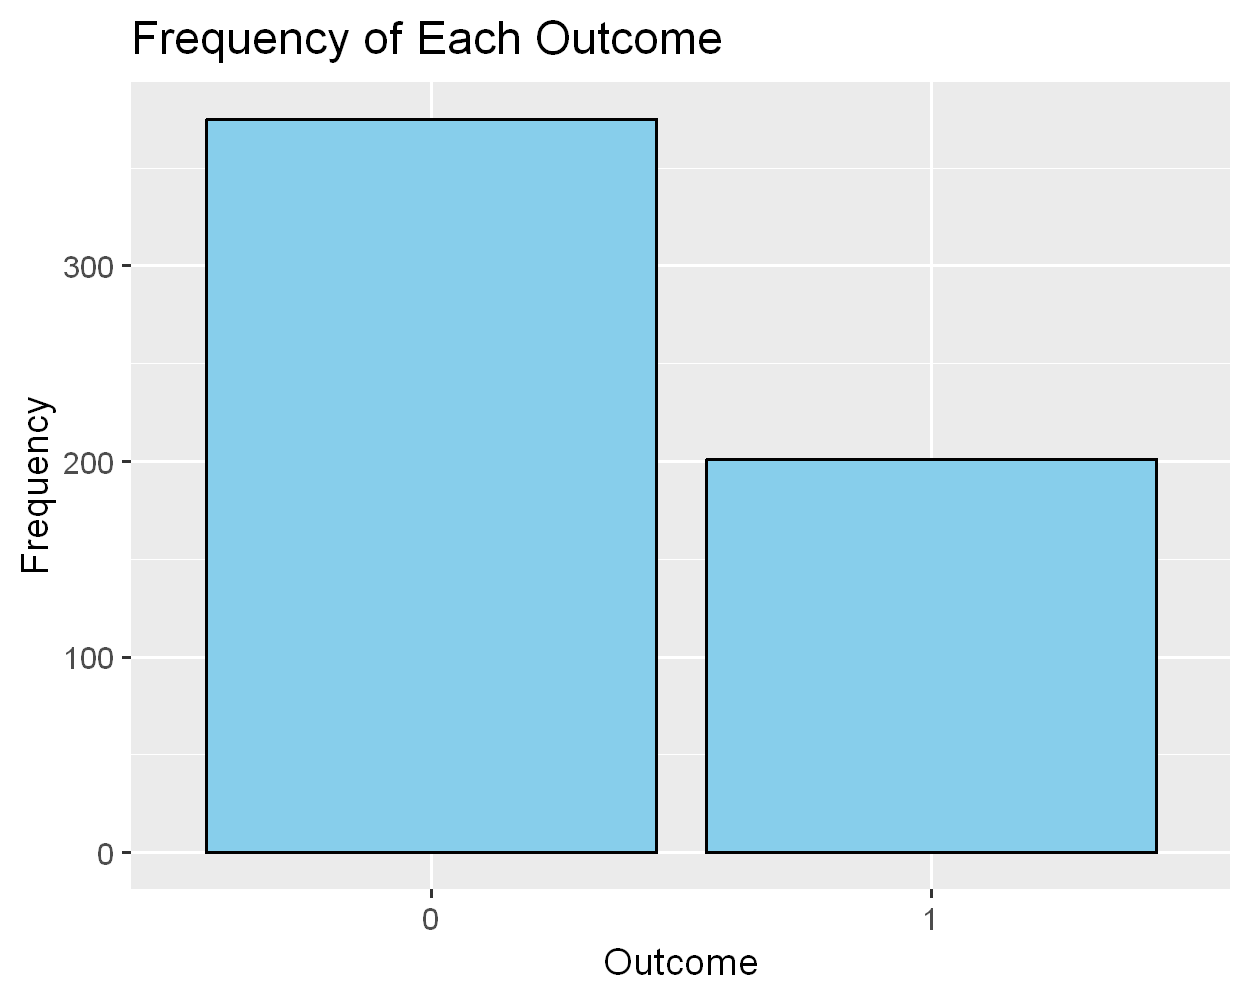

In [5]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Frequency of Each Outcome",
       x = "Outcome",
       y = "Frequency")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, there appears to be twice as many Negative outcomes than Positive outcomes. 



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

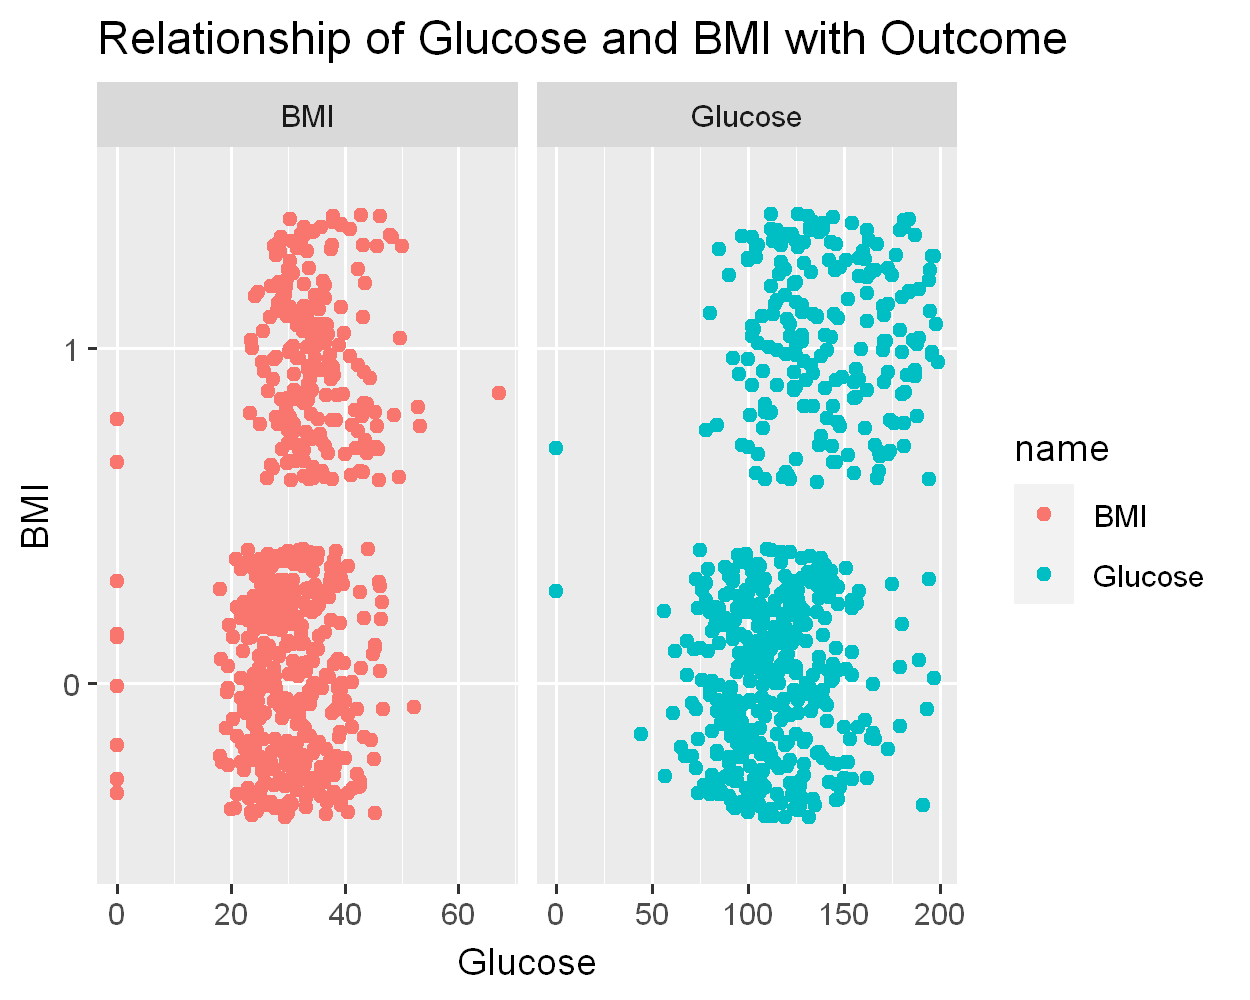

In [7]:
ggplot(plot_df, mapping = aes(x = value, y = Outcome,  color = name)) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Relationship of Glucose and BMI with Outcome",
       x = "Glucose",
       y = "BMI")

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

This would default the scales value to 'fixed', which would force the same x axis range to each graph. Allowing you to see the difference in scale between BMI and Glucose values. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -6.90283      0.06669      0.03264  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 601.5 	AIC: 607.5

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [9]:
diabeted_test_wPred =  augment(mod_fit, diabetes_test)

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [10]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 117  29
         1   8  38

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- 67
- 38
- 8